In [1]:
import os
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

parent_dir = "/content/drive/My Drive/Colab Notebooks/YOLOV8 Classification"
annotations_folder = "/content/drive/My Drive/Colab Notebooks/YOLOV8 Classification/model_annotations"
csv_file = "/content/drive/My Drive/Colab Notebooks/YOLOV8 Classification/union_final_type_of_coffee.csv"
print(f"CSV file exists: {os.path.exists(csv_file)}")

# Path to the new folder for modified annotation files
type_of_cup_annotations_folder = '/content/drive/My Drive/Colab Notebooks/YOLOV8 Classification/type_of_cup_annotations'
os.makedirs(type_of_cup_annotations_folder, exist_ok=True)

# Read the CSV file
df = pd.read_csv(csv_file)
print("DataFrame loaded. First few rows:")
print(df.head())

# Create a mapping from Image_Name to type_of_cup
# Remove file extension from image names before creating the mapping
image_name_to_type_of_cup = df.set_index(df['image_name'].apply(lambda x: os.path.splitext(x)[0]))['type_of_cup'].to_dict()

print("Image name to type_of_cup mapping:")
print(image_name_to_type_of_cup)

# Function to replace class IDs in the annotation files and save to new folder
def replace_class_ids_and_save(annotation_file, type_of_cup_label, new_file_path):
    print(f"Processing file: {annotation_file}")
    with open(annotation_file, 'r') as file:
        lines = file.readlines()

    if not lines:
        print(f"No lines to process in {annotation_file}")

    with open(new_file_path, 'w') as file:
        for line in lines:
            parts = line.strip().split()
            if len(parts) >= 5:
                # Replace the class ID with the type_of_cup label
                parts[0] = str(type_of_cup_label)
                file.write(' '.join(parts) + '\n')
            else:
                print(f"Unexpected line format in {annotation_file}: {line}")
    print(f"Saved modified file to: {new_file_path}")

# Iterate over all annotation files in the folder
annotation_files = os.listdir(annotations_folder)
print(f"Found {len(annotation_files)} annotation files.")

for annotation_filename in annotation_files:
    if annotation_filename.endswith('.txt'):
        # Extract the base name (without extension) to match with Image_Name in CSV
        image_name = os.path.splitext(annotation_filename)[0]
        print(f"Checking image name: {image_name}")
        if image_name in image_name_to_type_of_cup.keys():
            type_of_cup_label = image_name_to_type_of_cup[image_name]
            annotation_file_path = os.path.join(annotations_folder, annotation_filename)
            new_file_path = os.path.join(type_of_cup_annotations_folder, annotation_filename)
            replace_class_ids_and_save(annotation_file_path, type_of_cup_label, new_file_path)
        else:
            print(f"No type_of_cup label found for image name: {image_name}")
    else:
        print(f"Skipping non-txt file: {annotation_filename}")

print("Class IDs replaced and saved to new folder successfully.")

# Verify the contents of the type_of_cup_annotations_folder
print("Contents of type_of_cup_annotations_folder:")
for annotation_filename in os.listdir(type_of_cup_annotations_folder):
    print(annotation_filename)

Streaming output truncated to the last 5000 lines.
coffe_image(525)_augmented_4.txt
coffe_image(484)_augmented_1.txt
coffe_image(461)_augmented_7.txt
coffe_image(172)_augmented_5.txt
coffe_image(393)_augmented_5.txt
coffe_image(351)_augmented_8.txt
coffe_image(30)_augmented_2.txt
coffe_image(553).txt
coffe_image(227)_augmented_9.txt
coffe_image(626)_augmented_10.txt
coffe_image(410)_augmented_3.txt
coffe_image(318)_augmented_6.txt
coffe_image(75)_augmented_5.txt
coffe_image(457)_augmented_8.txt
coffe_image(190)_augmented_2.txt
coffe_image(594)_augmented_1.txt
coffe_image(543)_augmented_2.txt
coffe_image(588).txt
coffe_image(531)_augmented_7.txt
coffe_image(339)_augmented_4.txt
coffe_image(414)_augmented_12.txt
coffe_image(191)_augmented_1.txt
coffe_image(510)_augmented_1.txt
coffe_image(517)_augmented_1.txt
coffe_image(386)_augmented_6.txt
coffe_image(257)_augmented_7.txt
coffe_image(167)_augmented_5.txt
coffe_image(409)_augmented_1.txt
coffe_image(287)_augmented_11.txt
coffe_image(519

Split Data

In [2]:
import os
import shutil
import random
from sklearn.model_selection import train_test_split

# Paths
image_folder = "/content/drive/My Drive/Colab Notebooks/YOLOV8 Classification/model_images"
annotation_folder = "/content/drive/My Drive/Colab Notebooks/YOLOV8 Classification/type_of_cup_annotations"

# Output folders
output_base_folder = "/content/drive/My Drive/Colab Notebooks/YOLOV8 Classification/type_of_cup_Dataset"
train_image_folder = os.path.join(output_base_folder, 'train/images')
train_annotation_folder = os.path.join(output_base_folder, 'train/labels')
val_image_folder = os.path.join(output_base_folder, 'val/images')
val_annotation_folder = os.path.join(output_base_folder, 'val/labels')
test_image_folder = os.path.join(output_base_folder, 'test/images')
test_annotation_folder = os.path.join(output_base_folder, 'test/labels')

# Create output folders if they don't exist
for folder in [train_image_folder, train_annotation_folder, val_image_folder, val_annotation_folder, test_image_folder, test_annotation_folder]:
    os.makedirs(folder, exist_ok=True)

# List all image files
image_files = [f for f in os.listdir(image_folder) if f.endswith(('.jpg', '.jpeg', '.png'))]

# Split the dataset into training, validation, and test sets
train_files, test_files = train_test_split(image_files, test_size=0.2, random_state=42)
train_files, val_files = train_test_split(train_files, test_size=0.2, random_state=42)

def copy_files(files, src_image_folder, src_annotation_folder, dest_image_folder, dest_annotation_folder):
    for image_file in files:
        annotation_file = os.path.splitext(image_file)[0] + '.txt'
        # Source paths
        src_image_path = os.path.join(src_image_folder, image_file)
        src_annotation_path = os.path.join(src_annotation_folder, annotation_file)
        # Destination paths
        dest_image_path = os.path.join(dest_image_folder, image_file)
        dest_annotation_path = os.path.join(dest_annotation_folder, annotation_file)

        # Copy image file
        shutil.copy(src_image_path, dest_image_path)

        # Copy annotation file if it exists
        if os.path.exists(src_annotation_path):
            shutil.copy(src_annotation_path, dest_annotation_path)
        else:
            print(f"Warning: Annotation file {annotation_file} does not exist.")

# Copy files to the respective folders
copy_files(train_files, image_folder, annotation_folder, train_image_folder, train_annotation_folder)
copy_files(val_files, image_folder, annotation_folder, val_image_folder, val_annotation_folder)
copy_files(test_files, image_folder, annotation_folder, test_image_folder, test_annotation_folder)

print("Data has been split and organized into train, validation, and test folders.")


Data has been split and organized into train, validation, and test folders.


In [3]:
from PIL import Image
import os

# Function to resize images
def resize_image(image_path, output_path, target_size=(224, 224)):
    with Image.open(image_path) as img:
        img_resized = img.resize(target_size)
        img_resized.save(output_path)

# Function to normalize bounding box coordinates
def normalize_coordinates(label_file, image_width, image_height):
    with open(label_file, 'r') as file:
        lines = file.readlines()

    normalized_lines = []
    for line in lines:
        parts = line.strip().split()
        class_id = parts[0]
        coords = [float(coord) for coord in parts[1:]]

        # Assuming the format is [class_id, x_center, y_center, width, height]
        x_center, y_center, width, height = coords

        # Check if coordinates are already normalized
        if 0 <= x_center <= 1 and 0 <= y_center <= 1 and 0 <= width <= 1 and 0 <= height <= 1:
            normalized_lines.append(line)
        else:
            # Normalize the coordinates
            x_center /= image_width
            y_center /= image_height
            width /= image_width
            height /= image_height

            # Ensure that the coordinates are now in the [0, 1] range
            if 0 <= x_center <= 1 and 0 <= y_center <= 1 and 0 <= width <= 1 and 0 <= height <= 1:
                normalized_line = f"{class_id} {x_center} {y_center} {width} {height}\n"
                normalized_lines.append(normalized_line)
            else:
                print(f"Skipping non-normalized or out of bounds coordinates in {label_file}: {line.strip()}")

    with open(label_file, 'w') as file:
        file.writelines(normalized_lines)

# Function to process all label files
def process_labels(labels_dir, image_width, image_height):
    for root, _, files in os.walk(labels_dir):
        for file in files:
            if file.endswith(".txt"):
                normalize_coordinates(os.path.join(root, file), image_width, image_height)

# Function to process all images and labels in the dataset directory
def process_dataset(dataset_dir, image_width=224, image_height=224):
    for root, _, files in os.walk(dataset_dir):
        for file in files:
            if file.endswith((".jpg", ".jpeg", ".png")):
                image_path = os.path.join(root, file)
                resize_image(image_path, image_path, (image_width, image_height))
            elif file.endswith(".txt"):
                normalize_coordinates(os.path.join(root, file), image_width, image_height)

# Define the dataset directory
dataset_dir = "/content/drive/My Drive/Colab Notebooks/YOLOV8 Classification/type_of_cup_Dataset"

# Process all images and labels
process_dataset(f"{dataset_dir}/train", 224, 224)
process_dataset(f"{dataset_dir}/val", 224, 224)
process_dataset(f"{dataset_dir}/test", 224, 224)

print("All images have been resized and labels normalized.")

All images have been resized and labels normalized.


In [4]:
# Function to count how many images are not 224x224
def count_non_standard_images(images_dir, standard_width=224, standard_height=224):
    non_standard_count = 0
    for root, _, files in os.walk(images_dir):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                image_path = os.path.join(root, file)
                with Image.open(image_path) as img:
                    width, height = img.size
                    if width != standard_width or height != standard_height:
                        non_standard_count += 1
    return non_standard_count
dataset_dir = "/content/drive/My Drive/Colab Notebooks/YOLOV8 Classification/type_of_cup_Dataset"
# Count non-standard images in the dataset
train_images_dir = os.path.join(dataset_dir, "train/images")
val_images_dir = os.path.join(dataset_dir, "val/images")
test_images_dir = os.path.join(dataset_dir, "test/images")
non_standard_train = count_non_standard_images(train_images_dir)
non_standard_val = count_non_standard_images(val_images_dir)
non_standard_test = count_non_standard_images(test_images_dir)

print(f"Number of non-224x224 images in train set: {non_standard_train}")
print(f"Number of non-224x224 images in val set: {non_standard_val}")
print(f"Number of non-224x224 images in test set: {non_standard_test}")

Number of non-224x224 images in train set: 0
Number of non-224x224 images in val set: 0
Number of non-224x224 images in test set: 0


In [5]:
import os
from concurrent.futures import ThreadPoolExecutor

# Function to normalize bounding box coordinates
count = 0
def normalize_coordinates(label_file, image_width, image_height):
    with open(label_file, 'r') as file:
        lines = file.readlines()

    normalized_lines = []
    for line in lines:
        parts = line.strip().split()
        class_id = parts[0]
        coords = [float(coord) for coord in parts[1:]]

        # Assuming the format is [class_id, x_center, y_center, width, height]
        x_center, y_center, width, height = coords
        print("Cords:", coords)
        # Check if coordinates are already normalized
        if 0 <= x_center <= 1 and 0 <= y_center <= 1 and 0 <= width <= 1 and 0 <= height <= 1:
            normalized_lines.append(line)
        else:
            # Normalize the coordinates
            x_center /= image_width
            y_center /= image_height
            width /= image_width
            height /= image_height
            count += 1
            print("Non normalized cords:", coords)
            # Ensure that the coordinates are now in the [0, 1] range
            if 0 <= x_center <= 1 and 0 <= y_center <= 1 and 0 <= width <= 1 and 0 <= height <= 1:
                normalized_line = f"{class_id} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}\n"
                normalized_lines.append(normalized_line)
            else:
                print(f"Skipping non-normalized or out of bounds coordinates in {label_file}: {line.strip()}")

    with open(label_file, 'w') as file:
        file.writelines(normalized_lines)

# Function to process all labels in a specific directory
def process_labels_in_directory(labels_dir, image_width=224, image_height=224):
    for root, _, files in os.walk(labels_dir):
        for file in files:
            if file.endswith(".txt"):
                label_file_path = os.path.join(root, file)
                normalize_coordinates(label_file_path, image_width, image_height)

# Function to process the dataset labels in parallel
def process_dataset_labels_parallel(dataset_dir, image_width=224, image_height=224, max_workers=8):
    labels_dirs = [os.path.join(dataset_dir, "train/labels"),
                   os.path.join(dataset_dir, "val/labels"),
                   os.path.join(dataset_dir, "test/labels")]

    with ThreadPoolExecutor(max_workers=max_workers) as executor:
        futures = [executor.submit(process_labels_in_directory, labels_dir, image_width, image_height)
                   for labels_dir in labels_dirs]

        # Wait for all futures to complete
        for future in futures:
            future.result()

# Define the dataset directory
dataset_dir = "/content/drive/My Drive/Colab Notebooks/YOLOV8 Classification/type_of_cup_Dataset"

# Process all label files in parallel
process_dataset_labels_parallel(dataset_dir, 224, 224)

print("All label files have been normalized.")
print(count)

Streaming output truncated to the last 5000 lines.
Cords: [0.06053018569946289, 0.035052203706332614, 1.0, 0.9658452442714146]
Cords: [0.07844619240079607, 0.08876113380704607, 0.9291110719953265, 0.7325337954929897]
Cords: [0.06911151323999677, 0.12217278139931816, 0.7404461588178363, 0.7458793095179966]
Cords: [0.24877340453011648, 0.5914084570748466, 0.6271049635750907, 0.8166777747017997]
Cords: [0.318612848009382, 0.20478643689836776, 0.5517841066632952, 0.3448197841644287]
Cords: [0.3549848624638149, 0.4306459767477853, 0.5761892454964774, 0.656994274684361]
Cords: [0.3208467279161726, 0.5045773301805768, 0.6571412086486816, 0.683462415422712]
Cords: [0.488138096673148, 0.11471547399248395, 0.9857679775782994, 0.7068742343357631]
Cords: [0.4832316126142229, 0.1168668270111084, 0.8049259185791016, 0.5210516452789307]
Cords: [0.19109766823904856, 0.43610477447509766, 0.5082707745688302, 0.8440423692975726]
Cords: [0.2683816637311663, 0.5833252498081752, 0.6118032591683524, 0.950251

Train

In [6]:
!pip install ultralytics
from ultralytics import YOLO
from google.colab import drive
import os
# Mount Google Drive
drive.mount('/content/drive')
# Load the pre-trained YOLOv8 model with the coffee cup weights
model = YOLO("/content/drive/My Drive/Colab Notebooks/YOLOV8 Photos/yolov8n.pt")


# Define the path to save the trained model
save_dir = "/content/drive/My Drive/Colab Notebooks/YOLOV8 Classification/type_of_cup_runs"

# Fine-tune the model on the new dataset and save it to the specified directory
model.train(data='/content/drive/My Drive/Colab Notebooks/YOLOV8 Classification/type_of_cup_config.yaml',
            epochs=30, imgsz=224, project=save_dir, name='finetune_type_of_cup_run')

print("Model training completed and saved.")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 780.6/780.6 kB 9.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

100%|██████████| 755k/755k [00:00<00:00, 15.4MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/drive/My Drive/Colab Notebooks/YOLOV8 Classification/type_of_cup_Dataset/train/labels... 4659 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4659/4659 [02:40<00:00, 29.00it/s]


train: New cache created: /content/drive/My Drive/Colab Notebooks/YOLOV8 Classification/type_of_cup_Dataset/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/My Drive/Colab Notebooks/YOLOV8 Classification/type_of_cup_Dataset/val/labels... 1165 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1165/1165 [00:26<00:00, 43.83it/s]


val: New cache created: /content/drive/My Drive/Colab Notebooks/YOLOV8 Classification/type_of_cup_Dataset/val/labels.cache
Plotting labels to /content/drive/My Drive/Colab Notebooks/YOLOV8 Classification/type_of_cup_runs/finetune_type_of_cup_run/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 224 train, 224 val
Using 0 dataloader workers
Logging results to /content/drive/My Drive/Colab Notebooks/YOLOV8 Classification/type_of_cup_runs/finetune_type_of_cup_run
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30         0G      1.808      2.206      1.944          8        224: 100%|██████████| 292/292 [09:37<00:00,  1.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [01:12<00:00,  1.96s/it]

                   all       1165       1548      0.914      0.311      0.389       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30         0G      1.501      1.807      1.753          6        224: 100%|██████████| 292/292 [09:21<00:00,  1.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [01:12<00:00,  1.95s/it]

                   all       1165       1548      0.896      0.322      0.396      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30         0G      1.475       1.76      1.736          9        224: 100%|██████████| 292/292 [09:10<00:00,  1.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [01:11<00:00,  1.93s/it]

                   all       1165       1548      0.898      0.303      0.385      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30         0G      1.439      1.698      1.698         12        224: 100%|██████████| 292/292 [09:07<00:00,  1.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [01:10<00:00,  1.92s/it]

                   all       1165       1548      0.919      0.314      0.384      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30         0G      1.382      1.612      1.661          4        224: 100%|██████████| 292/292 [09:08<00:00,  1.88s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [01:08<00:00,  1.84s/it]

                   all       1165       1548       0.86      0.328      0.407      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30         0G      1.356      1.547       1.63          8        224: 100%|██████████| 292/292 [09:14<00:00,  1.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [01:10<00:00,  1.90s/it]

                   all       1165       1548      0.921      0.318      0.408      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30         0G      1.334      1.505      1.612          8        224: 100%|██████████| 292/292 [09:07<00:00,  1.88s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [01:10<00:00,  1.91s/it]

                   all       1165       1548      0.365      0.347      0.316      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30         0G      1.299      1.478       1.59          8        224: 100%|██████████| 292/292 [09:09<00:00,  1.88s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [01:12<00:00,  1.95s/it]

                   all       1165       1548      0.397      0.428      0.399      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30         0G      1.294      1.443      1.586         14        224: 100%|██████████| 292/292 [09:11<00:00,  1.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [01:10<00:00,  1.91s/it]

                   all       1165       1548      0.341      0.289      0.252      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30         0G      1.272      1.418      1.569         13        224: 100%|██████████| 292/292 [09:01<00:00,  1.85s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [01:09<00:00,  1.87s/it]

                   all       1165       1548      0.368      0.425      0.379      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30         0G      1.254      1.403      1.565          8        224: 100%|██████████| 292/292 [09:01<00:00,  1.85s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [01:12<00:00,  1.97s/it]

                   all       1165       1548      0.592      0.488      0.495      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30         0G       1.23      1.353      1.538         10        224: 100%|██████████| 292/292 [09:10<00:00,  1.88s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [01:09<00:00,  1.88s/it]

                   all       1165       1548       0.55      0.426       0.46      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30         0G      1.223      1.343      1.541         10        224: 100%|██████████| 292/292 [08:58<00:00,  1.85s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [01:07<00:00,  1.82s/it]

                   all       1165       1548      0.363      0.373      0.361      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30         0G      1.215      1.319       1.53         12        224: 100%|██████████| 292/292 [08:55<00:00,  1.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [01:09<00:00,  1.89s/it]

                   all       1165       1548       0.42      0.477      0.468      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30         0G      1.194       1.32      1.522          4        224: 100%|██████████| 292/292 [08:58<00:00,  1.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [01:11<00:00,  1.93s/it]

                   all       1165       1548       0.59      0.551      0.535      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30         0G      1.189      1.297      1.512         10        224: 100%|██████████| 292/292 [08:53<00:00,  1.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [01:08<00:00,  1.85s/it]

                   all       1165       1548      0.392      0.435      0.428      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30         0G      1.164      1.265      1.497         14        224: 100%|██████████| 292/292 [09:53<00:00,  2.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [01:24<00:00,  2.29s/it]

                   all       1165       1548      0.508       0.58      0.487      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30         0G      1.152      1.248      1.489         11        224: 100%|██████████| 292/292 [09:32<00:00,  1.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [01:07<00:00,  1.83s/it]

                   all       1165       1548      0.524      0.501      0.477      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30         0G      1.155      1.246      1.487         10        224: 100%|██████████| 292/292 [08:50<00:00,  1.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [01:10<00:00,  1.89s/it]

                   all       1165       1548      0.502      0.508      0.479      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30         0G      1.137      1.216      1.469         13        224: 100%|██████████| 292/292 [09:34<00:00,  1.97s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [01:17<00:00,  2.09s/it]

                   all       1165       1548      0.618      0.606      0.597      0.445


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30         0G     0.9085     0.9625      1.334          3        224: 100%|██████████| 292/292 [09:19<00:00,  1.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [01:12<00:00,  1.97s/it]

                   all       1165       1548      0.641      0.608      0.622      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30         0G     0.8622     0.8867      1.309          4        224: 100%|██████████| 292/292 [09:05<00:00,  1.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [01:07<00:00,  1.82s/it]

                   all       1165       1548       0.67      0.574      0.642      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30         0G      0.837     0.8445      1.296          5        224: 100%|██████████| 292/292 [08:42<00:00,  1.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [01:09<00:00,  1.89s/it]

                   all       1165       1548      0.614      0.659      0.636      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30         0G     0.8242       0.83      1.288          5        224: 100%|██████████| 292/292 [08:41<00:00,  1.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [01:07<00:00,  1.81s/it]

                   all       1165       1548      0.675      0.613      0.649      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30         0G     0.8121     0.8092      1.283          3        224: 100%|██████████| 292/292 [08:48<00:00,  1.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [01:11<00:00,  1.93s/it]

                   all       1165       1548      0.704       0.64       0.68      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30         0G     0.7866     0.7683      1.271          4        224: 100%|██████████| 292/292 [08:57<00:00,  1.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [01:10<00:00,  1.89s/it]

                   all       1165       1548      0.729      0.619      0.666      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30         0G     0.7662     0.7496      1.253          3        224: 100%|██████████| 292/292 [08:52<00:00,  1.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [01:07<00:00,  1.82s/it]

                   all       1165       1548       0.76      0.666        0.7      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30         0G      0.753     0.7353      1.246          3        224: 100%|██████████| 292/292 [08:40<00:00,  1.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [01:11<00:00,  1.92s/it]

                   all       1165       1548      0.699      0.636      0.664      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30         0G      0.726     0.7211      1.232          6        224: 100%|██████████| 292/292 [08:58<00:00,  1.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [01:10<00:00,  1.90s/it]

                   all       1165       1548      0.706      0.658      0.688      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30         0G     0.7229     0.7094      1.226          3        224: 100%|██████████| 292/292 [08:55<00:00,  1.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [01:10<00:00,  1.90s/it]

                   all       1165       1548      0.716      0.683      0.704      0.568



30 epochs completed in 5.149 hours.
Optimizer stripped from /content/drive/My Drive/Colab Notebooks/YOLOV8 Classification/type_of_cup_runs/finetune_type_of_cup_run/weights/last.pt, 6.2MB
Optimizer stripped from /content/drive/My Drive/Colab Notebooks/YOLOV8 Classification/type_of_cup_runs/finetune_type_of_cup_run/weights/best.pt, 6.2MB

Validating /content/drive/My Drive/Colab Notebooks/YOLOV8 Classification/type_of_cup_runs/finetune_type_of_cup_run/weights/best.pt...
Ultralytics YOLOv8.2.30 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [01:04<00:00,  1.74s/it]


                   all       1165       1548      0.715      0.683      0.704      0.568
              TakeAway         83        120      0.581      0.635      0.573      0.443
                   Cup       1082       1428       0.85      0.731      0.836      0.693
Speed: 0.8ms preprocess, 41.3ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to /content/drive/My Drive/Colab Notebooks/YOLOV8 Classification/type_of_cup_runs/finetune_type_of_cup_run
Model training completed and saved.


Test

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 780.6/780.6 kB 12.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-

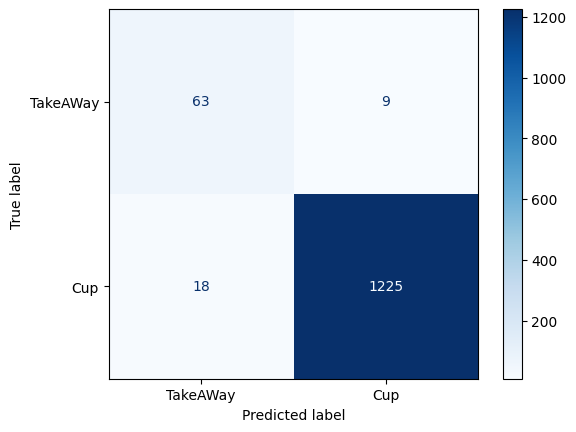

In [1]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
!pip install ultralytics
from google.colab import drive
import os
# Mount Google Drive
drive.mount('/content/drive')
from ultralytics import YOLO  # Assuming the YOLO library is correctly installed

# Paths to your dataset and model
images_folder = "/content/drive/My Drive/Colab Notebooks/YOLOV8 Classification/type_of_cup_Dataset/test/images/"
labels_folder = "/content/drive/My Drive/Colab Notebooks/YOLOV8 Classification/type_of_cup_Dataset/test/labels/"
model_path = "/content/drive/My Drive/Colab Notebooks/YOLOV8 Classification/type_of_cup_runs/finetune_type_of_cup_run/weights/best.pt"

# Load the model
model = YOLO(model_path)

# Class labels
class_labels = ['TakeAWay', 'Cup']

# Initialize lists to hold true and predicted labels
true_labels = []
predicted_labels = []

# Iterate over the images in the test folder
for image_path in glob.glob(os.path.join(images_folder, "*.jpg")):
    # Get the corresponding label file
    label_file = os.path.join(labels_folder, os.path.basename(image_path).replace(".jpg", ".txt"))

    # Read the true label
    with open(label_file, 'r') as file:
        true_class_id = int(file.readline().strip().split()[0])
        true_labels.append(true_class_id)

    # Perform prediction
    results = model.predict(image_path, device='cpu', conf=0.5)

    # Extract the predicted class with the highest confidence
    if len(results) > 0 and len(results[0].boxes) > 0:
        predicted_class_id = int(results[0].boxes[0].cls)
    else:
        predicted_class_id = -1  # If no prediction is made, assign an invalid class ID

    predicted_labels.append(predicted_class_id)

# Calculate the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels, labels=[0, 1])

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues)
plt.show()